# VOTER PARTICIPATION
Does a person's age correlate with whether they'll vote? Let's look at a few visualizations to learn more:

What is the voter participation percentage over time? We want to look at this metric broken down by age groups, as well as the overall total.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

voters = pd.read_excel('1964-2022_votingdata_workingcopy.xlsx')

In [2]:
voters.info()
voters.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age_group  150 non-null    object 
 1   year       150 non-null    int64  
 2   pop        150 non-null    int64  
 3   tot_part   150 non-null    float64
 4   cit_part   150 non-null    object 
 5   male       150 non-null    float64
 6   female     150 non-null    float64
dtypes: float64(3), int64(2), object(2)
memory usage: 8.3+ KB


,age_group,year,pop,tot_part,cit_part,male,female
0,total,2022,255457,47.7,52.2,46.6,48.8
1,total,2020,252274,61.3,66.8,59.5,63.0
2,total,2018,249748,49.0,53.4,47.2,50.6
3,total,2016,245502,56.0,61.4,53.8,58.1
4,total,2014,239874,38.5,41.9,37.2,39.6


In [3]:
voters = voters[['year', 'age_group', 'tot_part', 'pop', 'male', 'female']]
voters.info()
voters.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       150 non-null    int64  
 1   age_group  150 non-null    object 
 2   tot_part   150 non-null    float64
 3   pop        150 non-null    int64  
 4   male       150 non-null    float64
 5   female     150 non-null    float64
dtypes: float64(3), int64(2), object(1)
memory usage: 7.2+ KB


,year,age_group,tot_part,pop,male,female
0,2022,total,47.7,255457,46.6,48.8
1,2020,total,61.3,252274,59.5,63.0
2,2018,total,49.0,249748,47.2,50.6
3,2016,total,56.0,245502,53.8,58.1
4,2014,total,38.5,239874,37.2,39.6


In [4]:
pres_years = [2020, 2016, 2012, 2008, 2004, 2000, 1996, 1992, 1988, 1984, 1980, 1976, 1972, 1968, 1964]
voters = voters[voters['year'].isin(pres_years)]
voters

,year,age_group,tot_part,pop,male,female
1,2020,total,61.3,252274,59.5,63.0
3,2016,total,56.0,245502,53.8,58.1
5,2012,total,56.5,235248,54.4,58.5
7,2008,total,58.2,225499,55.7,60.4
9,2004,total,58.3,215694,56.3,60.1
...,...,...,...,...,...,...
141,1980,65_plus,65.1,24094,70.4,61.3
143,1976,65_plus,62.2,22001,68.3,58.0
145,1972,65_plus,63.5,20074,70.7,58.4
147,1968,65_plus,65.8,18468,73.1,60.3


In [5]:
voters = voters.set_index(['year', 'age_group'])
voters.head()

,,tot_part,pop,male,female
year,age_group,,,,
2020,total,61.3,252274,59.5,63.0
2016,total,56.0,245502,53.8,58.1
2012,total,56.5,235248,54.4,58.5
2008,total,58.2,225499,55.7,60.4
2004,total,58.3,215694,56.3,60.1


In [6]:
voters = voters.sort_values(by=['year', 'age_group'])
voters

tot_part     pop  male  female
year age_group                                
1964 18_24          50.9    9919  51.5    50.5
     25_44          69.0   45296  70.0    68.0
     45_64          75.9   38121  78.5    73.5
     65_plus        66.3   17269  73.7    60.4
     total          69.3  110604  71.9    67.0
...                  ...     ...   ...     ...
2020 18_24          48.0   28659  45.8    50.2
     25_44          55.0   86429  52.1    57.8
     45_64          65.5   81912  63.9    67.0
     65_plus        71.9   55273  72.9    71.0
     total          61.3  252274  59.5    63.0

[75 rows x 4 columns]

# Time Series Plot
Here is a line graph showing each age group, as well as the total voter participation percentages from the 1964 presidential election through the 2020 presidential election.

C:\Users\david\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\david\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


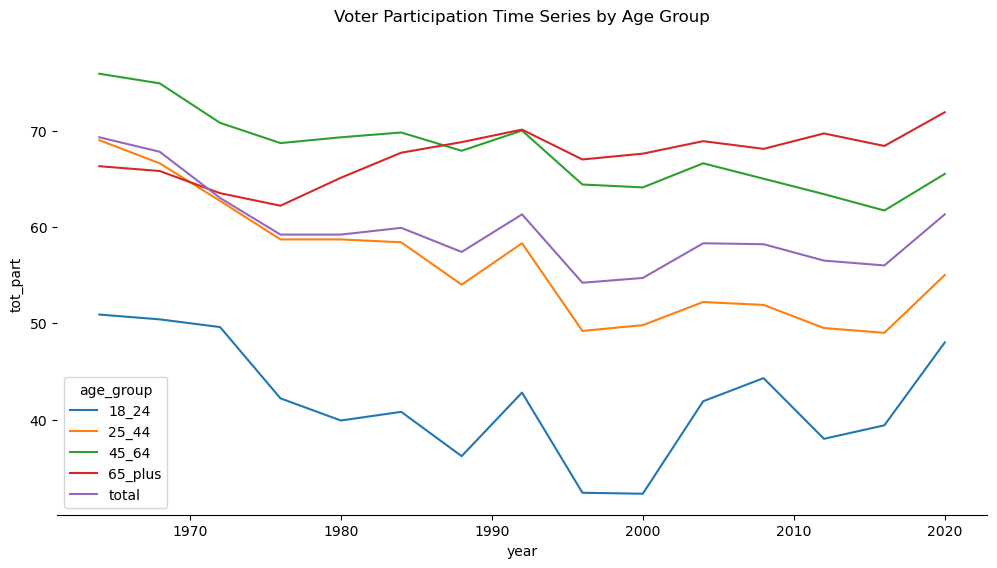

In [7]:
fig, ax = plt.subplots(figsize=(12,6))

sns.lineplot(data=voters, x='year', y='tot_part', hue='age_group')
ax.set_title('Voter Participation Time Series by Age Group', y=1.05)
ax.spines[['left', 'top', 'right']].set_visible(False)
plt.show()

In [10]:
pres_2020 = voters.loc[2020]
pres_2016 = voters.loc[2016]
pres_2012 = voters.loc[2012]
pres_2008 = voters.loc[2008]
pres_2004 = voters.loc[2004]
pres_2000 = voters.loc[2000]
pres_1996 = voters.loc[1996]
pres_1992 = voters.loc[1992]
pres_1988 = voters.loc[1988]
pres_1984 = voters.loc[1984]
pres_1980 = voters.loc[1980]
pres_1976 = voters.loc[1976]
pres_1972 = voters.loc[1972]
pres_1968 = voters.loc[1968]
pres_1964 = voters.loc[1964]
pres_2020

,tot_part,pop,male,female
age_group,,,,
18_24,48.0,28659,45.8,50.2
25_44,55.0,86429,52.1,57.8
45_64,65.5,81912,63.9,67.0
65_plus,71.9,55273,72.9,71.0
total,61.3,252274,59.5,63.0


# Bar Plot
Here are four bar plots showing each age group's (and the total) voter participation percentage for each of the most recent four presidential elections.

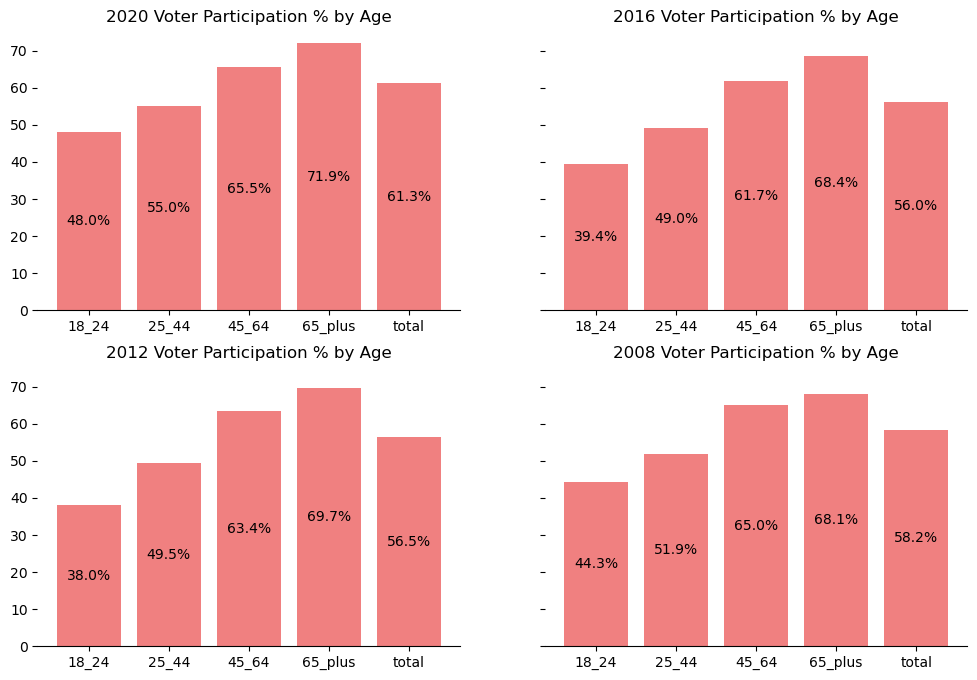

In [11]:
fig, ax = plt.subplots(2, 2, sharey=True, figsize=(12,8))

bar20 = ax[0,0].bar(pres_2020.index, pres_2020['tot_part'], color='lightcoral')
ax[0,0].set_title('2020 Voter Participation % by Age')
ax[0,0].bar_label(bar20, labels=[f"{x.get_height():.1f}%" for x in bar20], label_type='center')
ax[0,0].spines[['left', 'top', 'right']].set_visible(False)

bar16 = ax[0,1].bar(pres_2016.index, pres_2016['tot_part'], color='lightcoral')
ax[0,1].set_title('2016 Voter Participation % by Age')
ax[0,1].bar_label(bar16, labels=[f"{x.get_height():.1f}%" for x in bar16], label_type='center')
ax[0,1].spines[['left', 'top', 'right']].set_visible(False)

bar12 = ax[1,0].bar(pres_2012.index, pres_2012['tot_part'], color='lightcoral')
ax[1,0].set_title('2012 Voter Participation % by Age')
ax[1,0].bar_label(bar12, labels=[f"{x.get_height():.1f}%" for x in bar12], label_type='center')
ax[1,0].spines[['left', 'top', 'right']].set_visible(False)

bar08 = ax[1,1].bar(pres_2008.index, pres_2008['tot_part'], color='lightcoral')
ax[1,1].set_title('2008 Voter Participation % by Age')
ax[1,1].bar_label(bar08, labels=[f"{x.get_height():.1f}%" for x in bar08], label_type='center')
ax[1,1].spines[['left', 'top', 'right']].set_visible(False)

plt.show()

In [12]:
pres_2020_total = pres_2020.loc[pres_2020.index.isin(['total'])]
pres_2020_age_bins = pres_2020.loc[~pres_2020.index.isin(['total'])]
pres_2016_total = pres_2016.loc[pres_2016.index.isin(['total'])]
pres_2016_age_bins = pres_2016.loc[~pres_2016.index.isin(['total'])]
pres_2012_total = pres_2012.loc[pres_2012.index.isin(['total'])]
pres_2012_age_bins = pres_2012.loc[~pres_2012.index.isin(['total'])]
pres_2008_total = pres_2008.loc[pres_2008.index.isin(['total'])]
pres_2008_age_bins = pres_2008.loc[~pres_2008.index.isin(['total'])]

# Combination Plot
Here are four plots that show the voter participation percentages by age groups as bar charts, and the total as a line plot. There are four of these plots, showing each of the most recent four presidential elections.

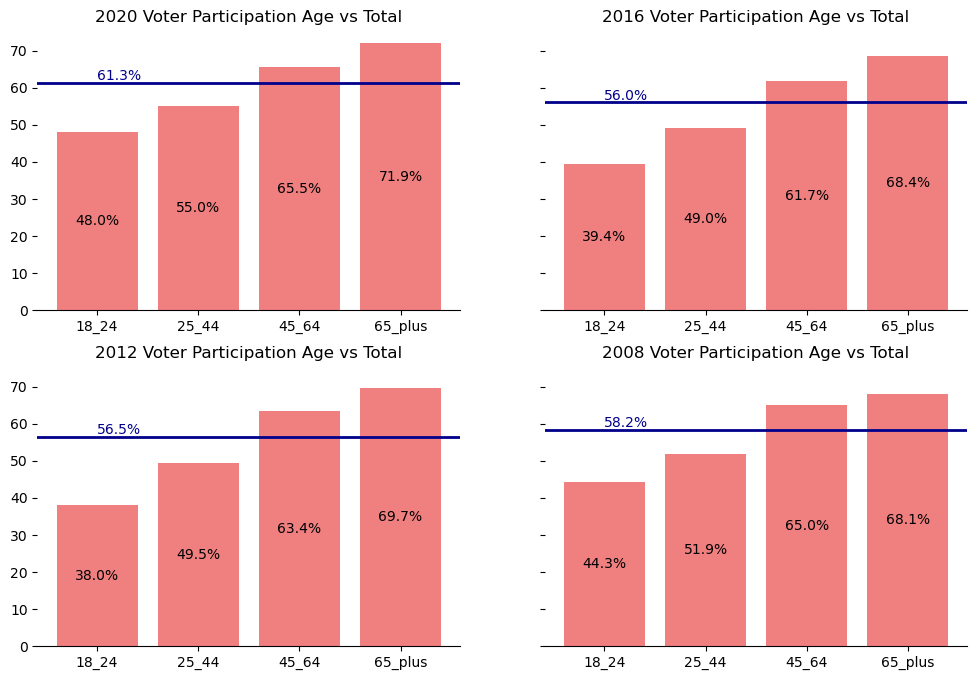

In [13]:
fig, ax = plt.subplots(2, 2, sharey=True, figsize=(12,8))

ages20 = ax[0,0].bar(pres_2020_age_bins.index, pres_2020_age_bins['tot_part'], color='lightcoral', label='Age Bins')
tot20 = ax[0,0].axhline(y=pres_2020_total['tot_part'].mean(), color='darkblue', linestyle='-', linewidth=2, label='Total')
ax[0,0].set_title('2020 Voter Participation Age vs Total')
ax[0,0].bar_label(ages20, labels=[f"{x.get_height():.1f}%" for x in ages20], label_type='center')
ax[0,0].text(0, pres_2020_total['tot_part'].mean(), f"{pres_2020_total['tot_part'].mean():.1f}%", color='darkblue', va='bottom')
ax[0,0].spines[['left', 'top', 'right']].set_visible(False)

ages16 = ax[0,1].bar(pres_2016_age_bins.index, pres_2016_age_bins['tot_part'], color='lightcoral', label='Age Bins')
tot16 = ax[0,1].axhline(y=pres_2016_total['tot_part'].mean(), color='darkblue', linestyle='-', linewidth=2, label='Total')
ax[0,1].set_title('2016 Voter Participation Age vs Total')
ax[0,1].bar_label(ages16, labels=[f"{x.get_height():.1f}%" for x in ages16], label_type='center')
ax[0,1].text(0, pres_2016_total['tot_part'].mean(), f"{pres_2016_total['tot_part'].mean():.1f}%", color='darkblue', va='bottom')
ax[0,1].spines[['left', 'top', 'right']].set_visible(False)

ages12 = ax[1,0].bar(pres_2012_age_bins.index, pres_2012_age_bins['tot_part'], color='lightcoral', label='Age Bins')
tot12 = ax[1,0].axhline(y=pres_2012_total['tot_part'].mean(), color='darkblue', linestyle='-', linewidth=2, label='Total')
ax[1,0].set_title('2012 Voter Participation Age vs Total')
ax[1,0].bar_label(ages12, labels=[f"{x.get_height():.1f}%" for x in ages12], label_type='center')
ax[1,0].text(0, pres_2012_total['tot_part'].mean(), f"{pres_2012_total['tot_part'].mean():.1f}%", color='darkblue', va='bottom')
ax[1,0].spines[['left', 'top', 'right']].set_visible(False)

ages08 = ax[1,1].bar(pres_2008_age_bins.index, pres_2008_age_bins['tot_part'], color='lightcoral', label='Age Bins')
tot08 = ax[1,1].axhline(y=pres_2008_total['tot_part'].mean(), color='darkblue', linestyle='-', linewidth=2, label='Total')
ax[1,1].set_title('2008 Voter Participation Age vs Total')
ax[1,1].bar_label(ages08, labels=[f"{x.get_height():.1f}%" for x in ages08], label_type='center')
ax[1,1].text(0, pres_2008_total['tot_part'].mean(), f"{pres_2008_total['tot_part'].mean():.1f}%", color='darkblue', va='bottom')
ax[1,1].spines[['left', 'top', 'right']].set_visible(False)

plt.show()

# Results
The line plot shows us that the 18-24 age group consistently has the lowest participation rate of all other age groups. From 1964 to 2000, that age group showed a steady decline in participation. Then from 2000 to 2020, it rose again to a level similar to the late 1960s.

Conversely, the 65 plus age group has shown the highest participation rate starting in 1992 through to the present. Before 1992, the 45-64 age group had the highest participation rate.

The 25-44 age group shows the second lowest participation rate, just above 18-24.

The combination bar/line plot shows each age group's parcipation percentage in a bar, with a line of the overall percentage overlayed on top, for the most recent four elections. These plots emphasize what we saw in the line plot, that the 18-24 and 25-44 age groups underperform the average, and the 45-64 and 65 plus age groups overperform the average.

A good follow up to this analysis would be to investigate why the younger groups do not vote as much as the older groups.